In [31]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [32]:
country_jan = pd.read_csv('QueriesByCountry_2020-01-01_2020-01-31.tsv', sep='\t')
country_feb = pd.read_csv('QueriesByCountry_2020-02-01_2020-02-29.tsv', sep='\t')
country_mar = pd.read_csv('QueriesByCountry_2020-03-01_2020-03-31.tsv', sep='\t')
country_apr = pd.read_csv('QueriesByCountry_2020-04-01_2020-04-30.tsv', sep='\t')
state_jan =  pd.read_csv('QueriesByState_2020-01-01_2020-01-31.tsv', sep='\t')
state_feb = pd.read_csv('QueriesByState_2020-02-01_2020-02-29.tsv', sep='\t')
state_mar = pd.read_csv('QueriesByState_2020-03-01_2020-03-31.tsv', sep='\t')
state_apr = pd.read_csv('QueriesByState_2020-04-01_2020-04-30.tsv', sep='\t')

Date : string, Date on which the query was issued.

Query : string, The actual search query issued by user(s).

IsImplicitIntent : bool, True if query did not mention covid or coronavirus or sarsncov2 (e.g, “Shelter in place”). False otherwise.

Country : string, Country from where the query was issued.

PopularityScore : int, Value between 1 and 100 inclusive. 1 indicates least popular query on the day/Country with Coronavirus intent, and 100 indicates the most popular query for the same Country on the same day.

In [33]:
country_apr.head()

,Date,Query,IsImplicitIntent,Country,PopularityScore
0,2020-04-01,is influenza a coronavirus,False,United States,1
1,2020-04-01,pennsylvania coronavirus stay at home,False,United States,1
2,2020-04-01,number of coronavirus tests by state,False,United States,1
3,2020-04-01,https://www.gov.uk/coronavirus-extremely-vulne...,False,United Kingdom,1
4,2020-04-01,cdc coronavirus update new york state,False,United States,1


In [34]:
state_jan.head()

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-01-01,p2 masks,True,New South Wales,Australia,1
1,2020-01-01,coronavirus,False,Pennsylvania,United States,1
2,2020-01-01,coronavirus,False,Michigan,United States,1
3,2020-01-01,auswärtiges amt,True,North Rhine-Westphalia,Germany,1
4,2020-01-01,p2 masks,True,Australian Capital Territory,Australia,1


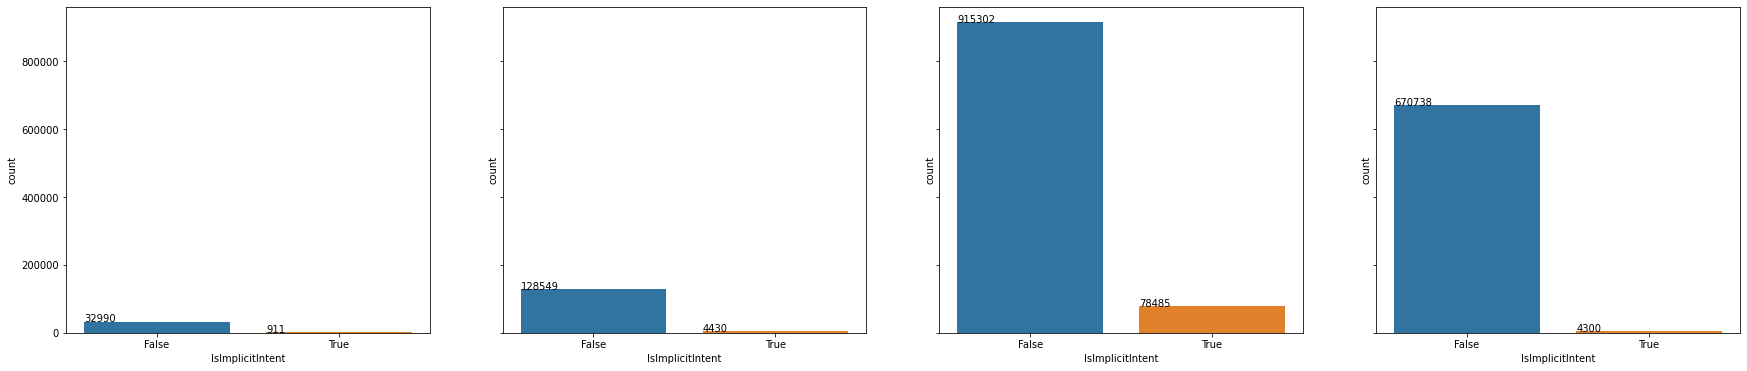

In [35]:
# Count the number of True and False in the dataset
f, axes = plt.subplots(1, 4, figsize = (30, 6), sharey = True)
ax = sb.countplot(x = 'IsImplicitIntent', data = country_jan, ax = axes[0])
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))
ax = sb.countplot(x = 'IsImplicitIntent', data = country_feb, ax = axes[1])
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))
ax = sb.countplot(x = 'IsImplicitIntent', data = country_mar, ax = axes[2])
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))
ax = sb.countplot(x = 'IsImplicitIntent', data = country_apr, ax = axes[3])
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))



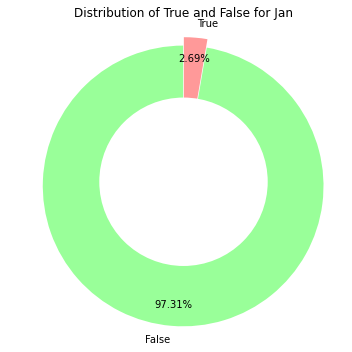

In [36]:
from pylab import rcParams 

fig1, ax1 = plt.subplots()

colors = ['#99ff99', '#ff9999']
country_jan["IsImplicitIntent"].value_counts().plot(kind = 'pie', colors=colors, startangle=90, pctdistance=0.85, 
                                    explode = [0.03, 0.03], figsize = (5, 5), autopct = '%1.2f%%')

plt.title("Distribution of True and False for Jan", fontsize=12)
plt.ylabel(" ")


centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

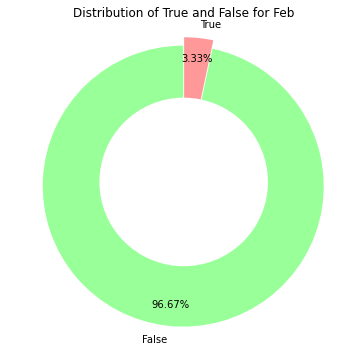

In [37]:
fig1, ax1 = plt.subplots()

colors = ['#99ff99', '#ff9999']
country_feb["IsImplicitIntent"].value_counts().plot(kind = 'pie', colors=colors, startangle=90, pctdistance=0.85, 
                                    explode = [0.03, 0.03], figsize = (5, 5), autopct = '%1.2f%%')

plt.title("Distribution of True and False for Feb", fontsize=12)
plt.ylabel(" ")


centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

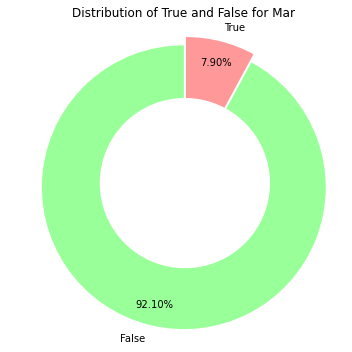

In [38]:
fig1, ax1 = plt.subplots()

colors = ['#99ff99', '#ff9999']
country_mar["IsImplicitIntent"].value_counts().plot(kind = 'pie', colors=colors, startangle=90, pctdistance=0.85, 
                                    explode = [0.03, 0.03], figsize = (5, 5), autopct = '%1.2f%%')

plt.title("Distribution of True and False for Mar", fontsize=12)
plt.ylabel(" ")

centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

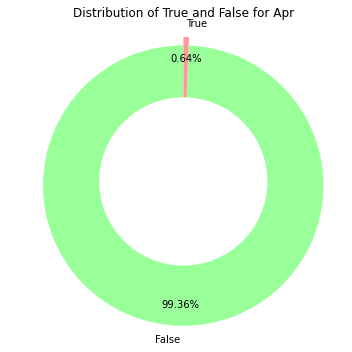

In [39]:
fig1, ax1 = plt.subplots()

colors = ['#99ff99', '#ff9999']
country_apr["IsImplicitIntent"].value_counts().plot(kind = 'pie', colors=colors, startangle=90, pctdistance=0.85, 
                                    explode = [0.03, 0.03], figsize = (5, 5), autopct = '%1.2f%%')

plt.title("Distribution of True and False for Apr", fontsize=12)
plt.ylabel(" ")


centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [40]:
country_jan_true = country_jan[country_jan['IsImplicitIntent'] ==  True]
country_jan_false = country_jan[country_jan['IsImplicitIntent'] ==  False]
country_feb_true = country_feb[country_feb['IsImplicitIntent'] ==  True]
country_feb_false = country_feb[country_feb['IsImplicitIntent'] ==  False]
country_mar_true = country_mar[country_mar['IsImplicitIntent'] ==  True]
country_mar_false = country_mar[country_mar['IsImplicitIntent'] ==  False]
country_apr_true = country_apr[country_apr['IsImplicitIntent'] ==  True]
country_apr_false = country_apr[country_apr['IsImplicitIntent'] ==  False]

In [41]:
country_jan_true.head()

,Date,Query,IsImplicitIntent,Country,PopularityScore
0,2020-01-01,webasto,True,Germany,1
2,2020-01-01,p2 masks,True,Australia,100
3,2020-01-01,china virus,True,United States,15
4,2020-01-01,p2 masks australia,True,Australia,1
5,2020-01-01,arrowe park hospital,True,United Kingdom,1


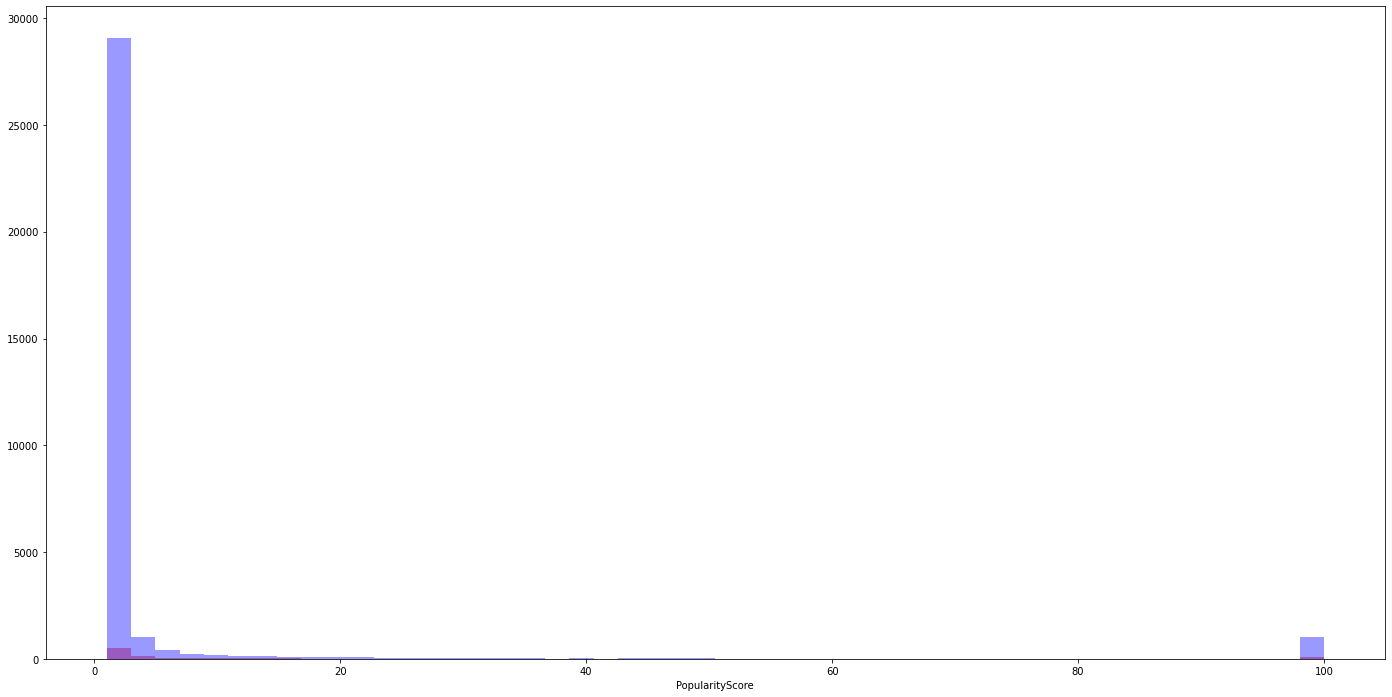

In [42]:
# Plotting a histogram for PopularityScore based on each month
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(country_jan_true["PopularityScore"], kde = False, color = "red")
sb.distplot(country_jan_false["PopularityScore"], kde = False, color = "blue")

That was not good because the number of True vs False is too skewed towards False. Gonna try with Trues for each month vs False for each month.

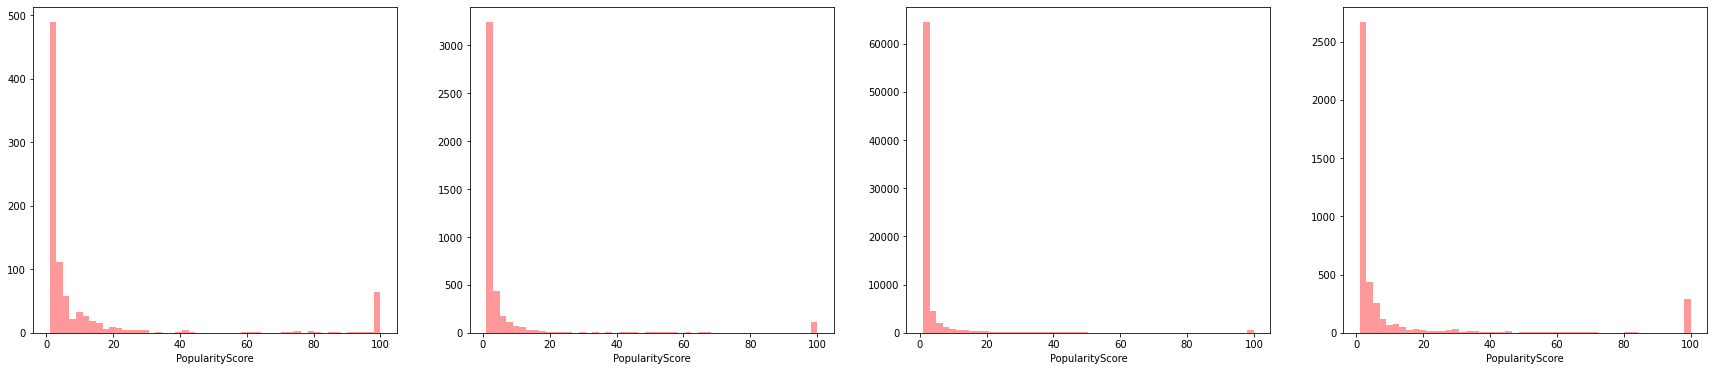

In [43]:
# Plotting histograms for True values
f, axes = plt.subplots(1, 4, figsize = (30, 6), sharey = False)
ax = sb.distplot(country_jan_true["PopularityScore"], kde = False, color = "red", ax = axes[0])
ax = sb.distplot(country_feb_true["PopularityScore"], kde = False, color = "red", ax = axes[1])
ax = sb.distplot(country_mar_true["PopularityScore"], kde = False, color = "red", ax = axes[2])
ax = sb.distplot(country_apr_true["PopularityScore"], kde = False, color = "red", ax = axes[3])


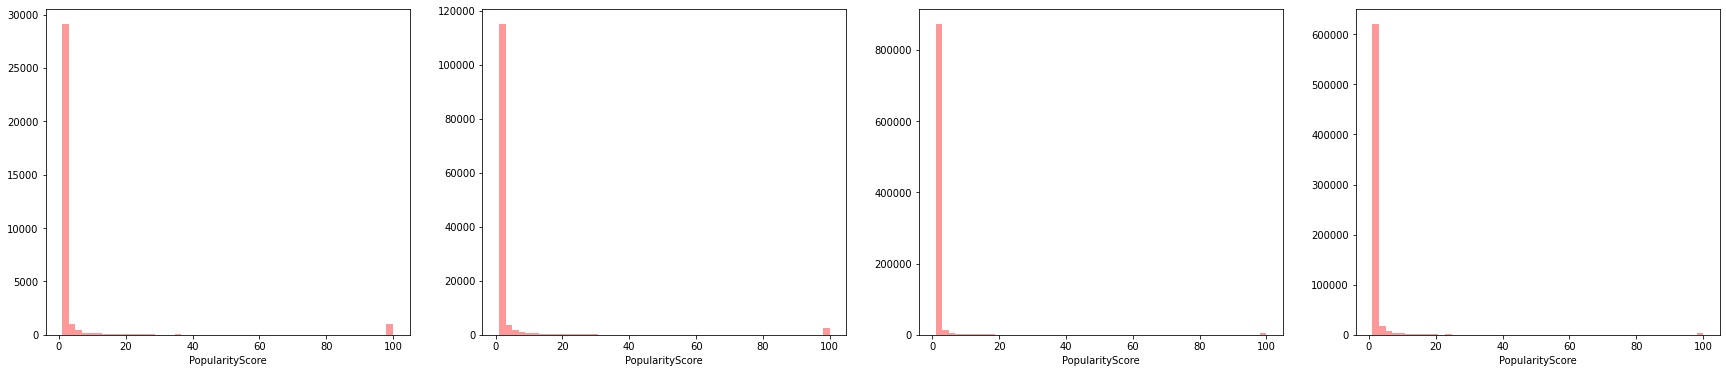

In [44]:
# Plotting histograms for False values
f, axes = plt.subplots(1, 4, figsize = (30, 6), sharey = False)
ax = sb.distplot(country_jan_false["PopularityScore"], kde = False, color = "red", ax = axes[0])
ax = sb.distplot(country_feb_false["PopularityScore"], kde = False, color = "red", ax = axes[1])
ax = sb.distplot(country_mar_false["PopularityScore"], kde = False, color = "red", ax = axes[2])
ax = sb.distplot(country_apr_false["PopularityScore"], kde = False, color = "red", ax = axes[3])


In [45]:
country_jan['Country'].value_counts()

United States               14330
United Kingdom               3330
Germany                      2670
Canada                       2172
France                       1396
                            ...  
Virgin Islands (British)        1
Gambia                          1
Tonga                           1
Northern Mariana Islands        1
Micronesia                      1
Name: Country, Length: 186, dtype: int64

In [46]:
country_feb['Country'].value_counts()

United States                       53233
United Kingdom                      14795
Germany                             12237
Italy                                9972
France                               7641
                                    ...  
Saint Vincent And The Grenadines        1
Anguilla                                1
Kazakhstan                              1
Moldova                                 1
Chad                                    1
Name: Country, Length: 189, dtype: int64

In [47]:
country_mar['Country'].value_counts()

United States     481819
United Kingdom    116569
France             78914
Germany            70046
Italy              51745
                   ...  
Mauritania             2
Belarus                2
Comoros                1
Tajikistan             1
Aland Islands          1
Name: Country, Length: 211, dtype: int64

In [48]:
country_apr['Country'].value_counts()

United States     367453
United Kingdom     63848
France             51790
Canada             38185
Germany            26956
                   ...  
Tonga                  1
Belarus                1
Sint Maarten           1
South Sudan            1
Niger                  1
Name: Country, Length: 198, dtype: int64

I guess its interesting to note that Italy was in the top 5 for Feb and Mar, which corresponds to when the country was facing the worst of the virus?

In [49]:
state_jan["State"].unique()

array(['New South Wales', 'Pennsylvania', 'Michigan',
       'North Rhine-Westphalia', 'Australian Capital Territory',
       'West Midlands', 'California', 'Merseyside', 'Missouri', 'Bavaria',
       'London', 'Ontario', 'East Sussex', 'Berlin', 'Greater Manchester',
       'Hamburg', 'Illinois', 'Tennessee', 'Rhineland-Palatinate',
       'Hertfordshire', 'New York', 'Hesse', 'Baden-Wuerttemberg',
       'West Yorkshire', 'Ohio', 'Virginia', 'Texas', 'South Yorkshire',
       'Wisconsin', 'Saxony', 'Lower Saxony', 'Essex', 'North Carolina',
       'Colorado', 'Victoria', 'Durham', 'Lancashire', 'Washington',
       'Indiana', 'Florida', 'Kingston Upon Hull', 'England', 'Kansas',
       'Schleswig-Holstein', 'Occitanie', 'Saitama', 'Niigata', 'Beijing',
       'Central And Western District', 'Tyne And Wear', 'Nagano', 'Aichi',
       'Toyama', 'Hiroshima', 'Shanghai', 'Ishikawa', 'Jiangsu',
       'Kanagawa', 'Maryland', 'Chiba', 'Tokyo', 'Gifu', 'Fujian',
       'Fukuoka', 'Okayama',

In [50]:
state_jan["Country"].unique()

array(['Australia', 'United States', 'Germany', 'United Kingdom',
       'Canada', 'France', 'Japan', 'China', 'Hong Kong', 'Taiwan',
       'Philippines', 'Mexico', 'Spain', 'Colombia', 'Malaysia', 'India',
       'Sweden', 'Netherlands', 'Italy', 'Austria', 'Brazil', 'Indonesia',
       'United Arab Emirates', 'Finland', 'Ireland', 'Belgium',
       'Singapore', 'Switzerland', 'South Africa', 'Nigeria',
       'New Zealand', 'Korea (South)', 'Thailand', 'Barbados',
       'Nicaragua', 'Argentina', 'Romania', 'Honduras', 'Turkey',
       'Papua New Guinea', 'Belize', 'Guatemala', 'Costa Rica', 'Peru',
       'Luxembourg', 'Chile', 'El Salvador', 'Norway', 'Venezuela',
       'Panama', 'Ecuador', 'Czech Republic', 'Fiji', 'Kenya', 'Nepal',
       'Puerto Rico', 'Bahamas', 'Dominican Republic', 'Jamaica',
       'Zimbabwe', 'Paraguay', 'Portugal', 'Denmark', 'Madagascar',
       'Qatar', 'Senegal', 'Trinidad And Tobago', 'Kuwait', 'Bermuda',
       'Ghana', 'Uruguay', 'Hungary', 'Zambia

In [51]:
state_jan_total = state_jan.groupby(["State"]).sum()
state_jan_total = state_jan_total.drop(columns = ["IsImplicitIntent"])

state_feb_total = state_feb.groupby(["State"]).sum()
state_feb_total = state_feb_total.drop(columns = ["IsImplicitIntent"])

state_mar_total = state_mar.groupby(["State"]).sum()
state_mar_total = state_mar_total.drop(columns = ["IsImplicitIntent"])

state_apr_total = state_apr.groupby(["State"]).sum()
state_apr_total = state_apr_total.drop(columns = ["IsImplicitIntent"])
state_jan_total

,PopularityScore
State,
Aargau,421
Aberdeen City,529
Aberdeenshire,7
Abidjan,9
Abruzzi,511
...,...
Zlinsky Kraj,207
Zug,107
Zulia,7


In [52]:
state_jan_total = state_jan_total.merge(state_jan, on="State")
state_jan_total.head(50)


,State,PopularityScore_x,Date,Query,IsImplicitIntent,Country,PopularityScore_y
0,Aargau,421,2020-01-23,coronavirus,False,Switzerland,1
1,Aargau,421,2020-01-24,coronavirus,False,Switzerland,1
2,Aargau,421,2020-01-25,coronavirus,False,Switzerland,1
3,Aargau,421,2020-01-26,coronavirus,False,Switzerland,1
4,Aargau,421,2020-01-27,coronavirus schweiz,False,Switzerland,1
5,Aargau,421,2020-01-27,coronavirus,False,Switzerland,100
6,Aargau,421,2020-01-27,corona virus,False,Switzerland,7
7,Aargau,421,2020-01-28,corona virus,False,Switzerland,1
8,Aargau,421,2020-01-28,coronavirus,False,Switzerland,100
9,Aargau,421,2020-01-29,coronavirus schweiz,False,Switzerland,5


In [53]:
state_jan_total = state_jan_total.drop(columns=["Date", "Query", "IsImplicitIntent", "PopularityScore_y"])

In [54]:
state_jan_total.drop_duplicates()

,State,PopularityScore_x,Country
0,Aargau,421,Switzerland
15,Aberdeen City,529,United Kingdom
34,Aberdeenshire,7,United Kingdom
41,Abidjan,9,Cote D'ivoire
50,Abruzzi,511,Italy
...,...,...,...
39898,Zlinsky Kraj,207,Czech Republic
39907,Zug,107,Switzerland
39915,Zulia,7,Venezuela
39922,Zurich,1256,Switzerland


In [55]:
import altair as alt
alt.data_transformers.disable_max_rows()

source = state_jan_total

alt.Chart(source).mark_circle().encode(
    x='Country',
    y='PopularityScore_x',
    size='State'
)

alt.Chart(...)